In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [63]:
train = pd.read_csv('train.csv')
labels = train.Survived

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1]:
# Pclass is ordinal variable , has order in them: like Pclass in order 1 > 2 > 3

In [7]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### There are 3 columns with missing values Age,Cabin,Embarked. Since Cabin has many missing values we can reject it

### Data-Visualization

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


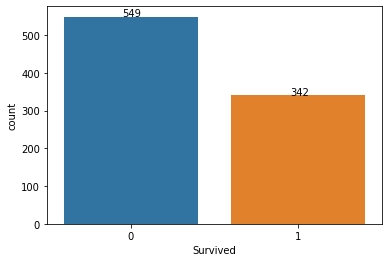

In [5]:
ax = sns.countplot(train['Survived'])
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.35,p.get_height()+0.2))

So (549/891)=61% of the people died 

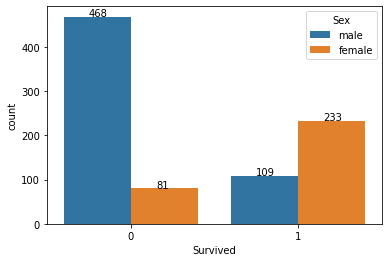

In [6]:
ax = sns.countplot(x='Survived',data=train,hue='Sex')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.2))

In [7]:
print("Percentage of women survived",(233/(233+81))) 
# 75% women survived 
print("Percentage of men survived",(109/(109+468)))
#18% men survived 

Percentage of women survived 0.7420382165605095
Percentage of men survived 0.18890814558058924


In [7]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead  =train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

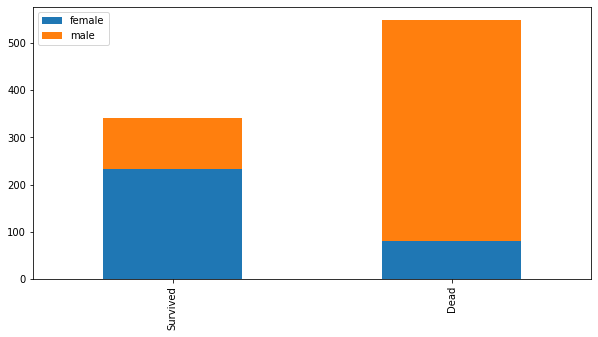

In [8]:
bar_chart('Sex')

#### Insights 
Chances of survival for women were more than that of men 

Around 468 males died and 109 survived, around 233 females survived and 81 died

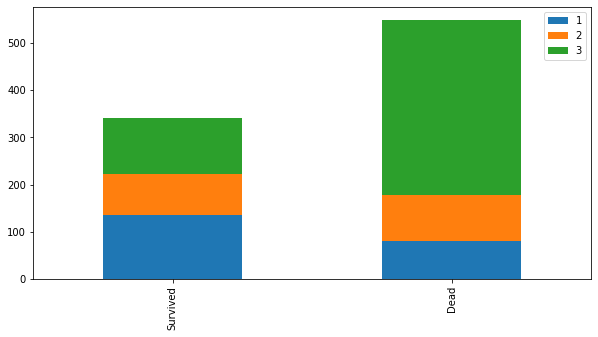

In [9]:
bar_chart('Pclass')

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


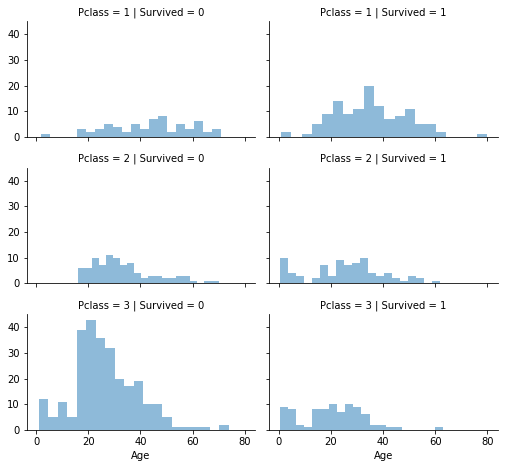

In [12]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

1. FacetGrid maps Pclass and Age and Survived, so seeing from the graphs Pclass=3 and Survived =1 and Pclass=3, S=1 many infants survived  
2. Most survived from Pclass=1 of age group 18-40

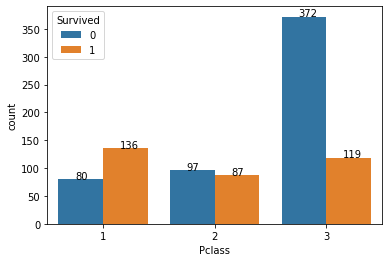

In [10]:
ax = sns.countplot(x='Pclass',data=train,hue='Survived')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.2))

In [11]:
print("percentage of survival of first class=",(136/(136+80))*100 )
print("percentage of survival of second class=",(87/(87+97))*100)
print("percentage of survival of third class=",(119/(119+372))*100)

percentage of survival of first class= 62.96296296296296
percentage of survival of second class= 47.28260869565217
percentage of survival of third class= 24.236252545824847


Third class passengers had the most risk of death 
1st class passengers had highest survival rate

In [4]:
train.describe(include=['O']) # to describe categorical objects

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McNamee, Mr. Neal",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
train[train['Age'].isnull()]
#177 NULL values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [13]:
train['Age'].mean()

29.69911764705882

In [14]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

Substituting the age columns with mean or median will make the data highly biased towards one age
Hence substituting with random values

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

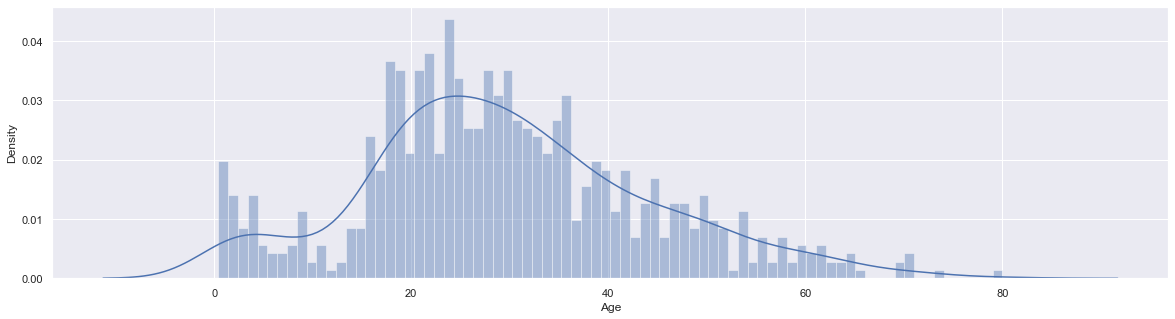

In [31]:
#Analysing the age
plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
sns.distplot(train['Age'], bins=80)
#We got the distribution of age groups using distplot but we also want to see which age group people died more 

People from the age group 18-35 most abundant and then it gradually decreases 

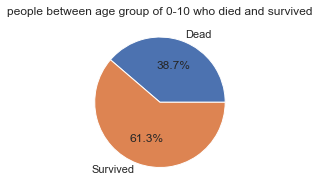

In [34]:
def age_pie(x,y,title):
    total_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].count() # total number of people in that age group
    survived_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].sum() #will sum the 1's and 0's and tell the number of survived people
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw = dict(aspect='equal'))
    ax.pie(x=[total_010-survived_010, survived_010], labels=['Dead','Survived'], autopct='%1.1f%%')
    ax.set_title(title)
    
age_pie(0,10,'people between age group of 0-10 who died and survived')    

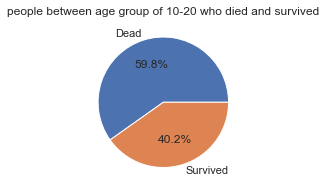

In [35]:
def age_pie(x,y,title):
    total_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].count() # total number of people in that age group
    survived_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].sum() #will sum the 1's and 0's and tell the number of survived people
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw = dict(aspect='equal'))
    ax.pie(x=[total_010-survived_010, survived_010], labels=['Dead','Survived'], autopct='%1.1f%%')
    ax.set_title(title)
    
age_pie(10,20,'people between age group of 10-20 who died and survived')    

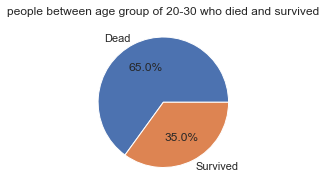

In [36]:
def age_pie(x,y,title):
    total_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].count() # total number of people in that age group
    survived_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].sum() #will sum the 1's and 0's and tell the number of survived people
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw = dict(aspect='equal'))
    ax.pie(x=[total_010-survived_010, survived_010], labels=['Dead','Survived'], autopct='%1.1f%%')
    ax.set_title(title)
    
age_pie(20,30,'people between age group of 20-30 who died and survived')    

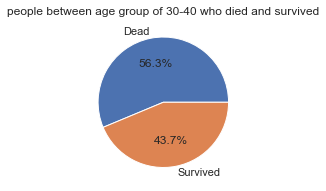

In [37]:
def age_pie(x,y,title):
    total_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].count() # total number of people in that age group
    survived_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].sum() #will sum the 1's and 0's and tell the number of survived people
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw = dict(aspect='equal'))
    ax.pie(x=[total_010-survived_010, survived_010], labels=['Dead','Survived'], autopct='%1.1f%%')
    ax.set_title(title)
    
age_pie(30,40,'people between age group of 30-40 who died and survived')    

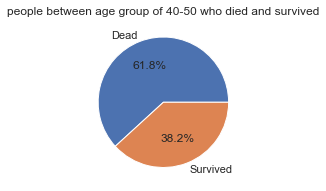

In [38]:
def age_pie(x,y,title):
    total_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].count() # total number of people in that age group
    survived_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].sum() #will sum the 1's and 0's and tell the number of survived people
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw = dict(aspect='equal'))
    ax.pie(x=[total_010-survived_010, survived_010], labels=['Dead','Survived'], autopct='%1.1f%%')
    ax.set_title(title)
    
age_pie(40,50,'people between age group of 40-50 who died and survived')    

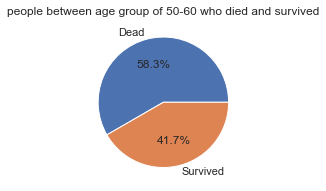

In [39]:
def age_pie(x,y,title):
    total_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].count() # total number of people in that age group
    survived_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].sum() #will sum the 1's and 0's and tell the number of survived people
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw = dict(aspect='equal'))
    ax.pie(x=[total_010-survived_010, survived_010], labels=['Dead','Survived'], autopct='%1.1f%%')
    ax.set_title(title)
    
age_pie(50,60,'people between age group of 50-60 who died and survived')    

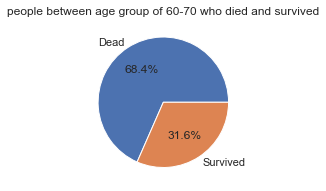

In [41]:
def age_pie(x,y,title):
    total_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].count() # total number of people in that age group
    survived_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].sum() #will sum the 1's and 0's and tell the number of survived people
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw = dict(aspect='equal'))
    ax.pie(x=[total_010-survived_010, survived_010], labels=['Dead','Survived'], autopct='%1.1f%%')
    ax.set_title(title)
    
age_pie(60,70,'people between age group of 60-70 who died and survived')     
# chances of death more but people were also very less  

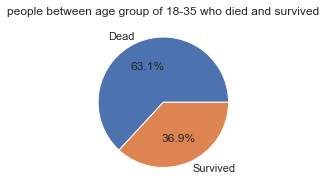

In [40]:
def age_pie(x,y,title):
    total_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].count() # total number of people in that age group
    survived_010 = train.loc[(train['Age']>=x) & (train['Age']<y)]['Survived'].sum() #will sum the 1's and 0's and tell the number of survived people
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw = dict(aspect='equal'))
    ax.pie(x=[total_010-survived_010, survived_010], labels=['Dead','Survived'], autopct='%1.1f%%')
    ax.set_title(title)
    
age_pie(18,35,'people between age group of 18-35 who died and survived')    

#### Insights
1. Max people were of the age 24
2. people in the age group 20-30 had maximum death rate 65%
3. other age groups except 0-10 also had death rate around 60%

In [16]:
#Substituing with random values in age column 
def impute_NaN(df,variable):
    df[variable+'_random'] = df[variable]
    #random samples to fill na
    random_samples = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_samples.index = df[df[variable].isnull()].index # changing only the index of the random samples from 'Age' column to 
                                                      # those of the NaN values from the 'Age' column 
    df.loc[df[variable].isnull(),variable+'_random'] = random_samples  #df['variable'].isnull() will give a boolean
                                                                        #series which will serve in selecting rows and then column as variable+'_random'
    

In [20]:
impute_NaN(train,'Age_random')
train['Age_random'].isnull().sum()

0

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_random', ylabel='Density'>

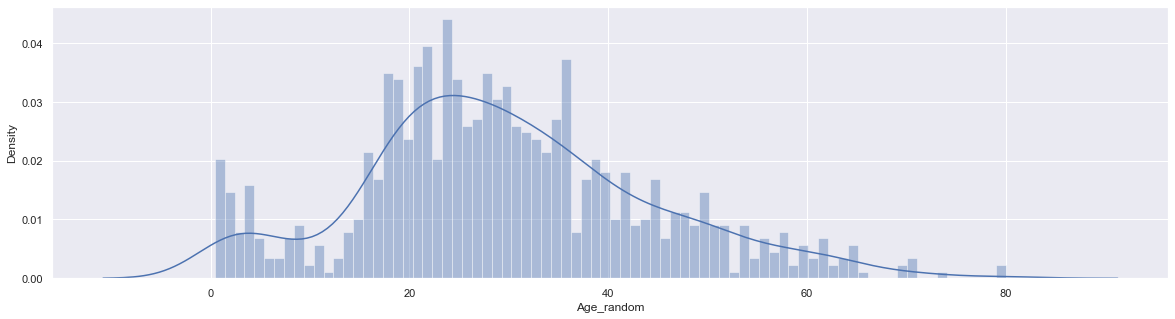

In [21]:
#Analysing the age
plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
sns.distplot(train['Age_random'], bins=80)
#We got the distribution of age groups using distplot but we also want to see which age group people died more 

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

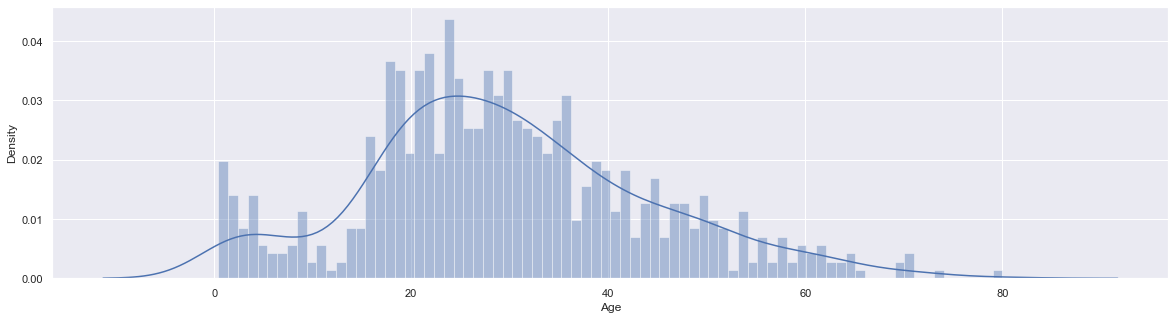

In [22]:
#Analysing the age
plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
sns.distplot(train['Age'], bins=80)
#We got the distribution of age groups using distplot but we also want to see which age group people died more 

Since Age has relevance in the prediction of survival and analysis reveals survival rates band wise 

We may want to create new feature for Age bands.

### Analysis of SibSp, Parch

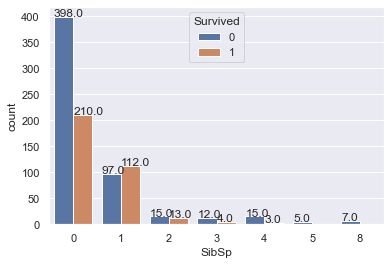

In [23]:
ax = sns.countplot(x='SibSp',data=train,hue='Survived')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x(),p.get_height()+0.2))

#Most people came alone, People with 1 sibling or spouse survived more     

In [24]:
print("Percentage of people who survived and came with 0sibsp",210/(210+398))
print("Percentage of people who survived and came with 1sibsp",112/(112+97))

Percentage of people who survived and came with 0sibsp 0.34539473684210525
Percentage of people who survived and came with 1sibsp 0.5358851674641149


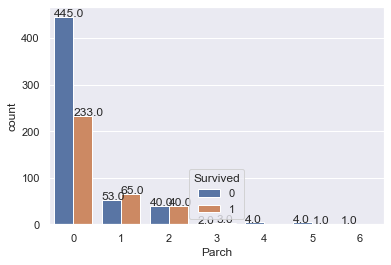

In [43]:
ax = sns.countplot(x='Parch',data=train,hue='Survived')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x(),p.get_height()+0.2))

#Most people came alone, People with 1 parent or child survived more  
#Probably because they came with family so they were given preference 

In [25]:
print("Percentage of people who survived and came with 0Parch",233/(233+445))
print("Percentage of people who survived and came with 1Parch",65/(65+53))

Percentage of people who survived and came with 0Parch 0.34365781710914456
Percentage of people who survived and came with 1Parch 0.5508474576271186


In [26]:
print("People with no parent or children",train[train['Parch']==0].count()/891*100)


People with no parent or children PassengerId          76.094276
Survived             76.094276
Pclass               76.094276
Name                 76.094276
Sex                  76.094276
Age                  58.473625
SibSp                76.094276
Parch                76.094276
Ticket               76.094276
Fare                 76.094276
Cabin                15.824916
Embarked             75.869809
Age_random           76.094276
Age_random_random    76.094276
dtype: float64


/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

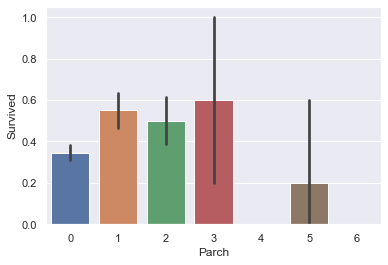

In [45]:
sns.barplot(train.Parch,train.Survived)
#To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, 
#and we see that it creates a plot taking a mean per categorical column.

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

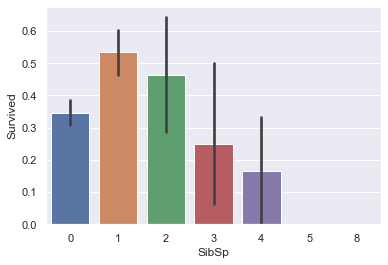

In [46]:
sns.barplot(train.SibSp,train.Survived)

#### Insights
1. People with 1 or 2 parent and 1 or 2 children had survival rate of around 0.6
2. People with 1 spouse or (0 or 1) children or 2 children had survival rate of around 0.5
3. Around 70-75 % people came alone and had less survival rate 

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

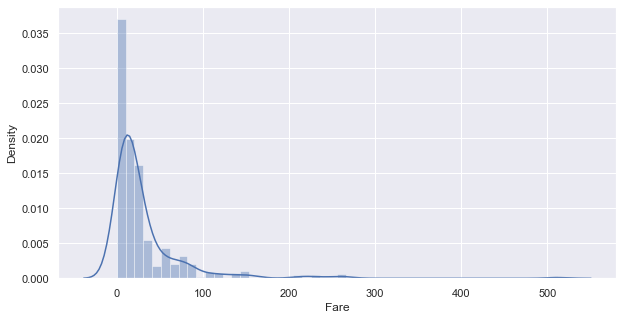

In [48]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(train['Fare'])

maximum number of people paid a lesser amount of fare

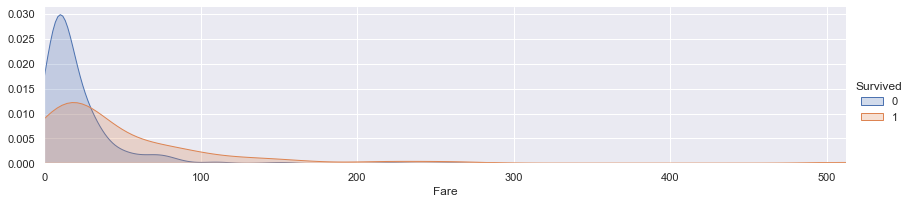

In [53]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

#### Insights
1. Maximum people paid a fare of 10
2. Very few people paid greater than 200
3. But the people who paid more had a higher chance of survival or survived more than people who paid less

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


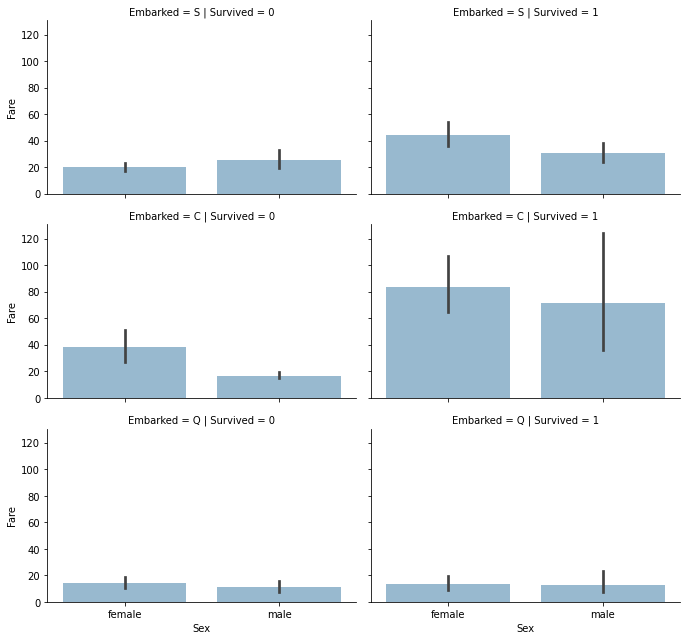

In [8]:
facet = sns.FacetGrid(train, row='Embarked',col='Survived', aspect = 1.6)
facet.map(sns.barplot,'Sex','Fare',alpha =.5)
facet.add_legend()

People who paid more survived more , particularly in Embarked='C' high fare paying passengers

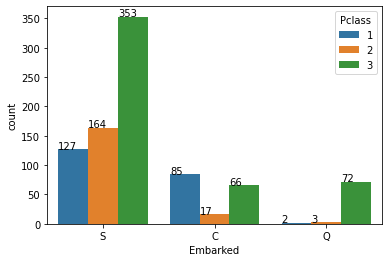

In [9]:
ax = sns.countplot(x='Embarked',data = train, hue='Pclass')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x(),p.get_height()+0.2))

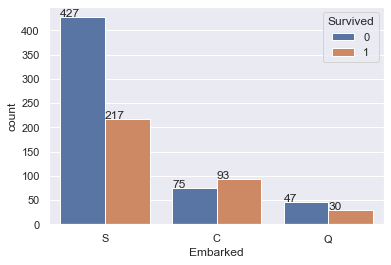

In [34]:
ax = sns.countplot(x='Embarked',data=train,hue='Survived')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x(),p.get_height()+0.2))

In [29]:
train['Ticket'].value_counts()

CA. 2343     7
1601         7
347082       7
3101295      6
CA 2144      6
            ..
341826       1
347064       1
349248       1
28213        1
C.A. 5547    1
Name: Ticket, Length: 681, dtype: int64

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


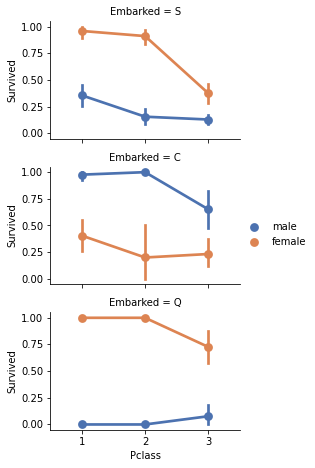

In [7]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6) # FacetGrid row and col values stacked as rows and cols means all possible permutations of values 
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')# X-Pclass, Y-Survived, Hue-Sex
grid.add_legend()

1. In Embarked C males had higher survival rate than females
2. For Embarked = Q males had higher survival rate for Pclass=3

## Data Cleaning and Pre-Processing

<AxesSubplot:>

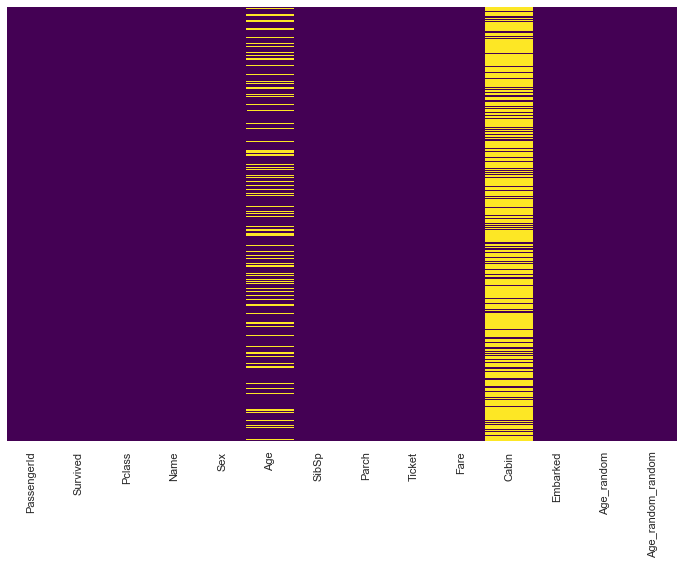

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False, cmap='viridis')

In [36]:
train.drop('Age_random_random',axis=1,inplace=True)

In [37]:
train.drop('Age',axis=1,inplace=True)

In [45]:
train.Age.mean()

29.69911764705882

In [46]:
train.Age.isnull().sum()

177

There are a lot of ways to handle the missing values like replacing them with mean or median or some random values or from the end of the distribution, but here we will replace the age values of a particular Pclass with the mean of the age values of that P class. Like overall mean is 29. but for Pclass 1 we will replace ages of person in Pclass 1 with 38

In [47]:
train.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [48]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
    else:
        return Age
    

In [49]:
train['Age'] = train[['Age','Pclass']].apply(inpute_age, axis=1) # so basically is there is any null value in train['Age']
                  #it replaces the null value with the mean and if not null then returns the original value

<AxesSubplot:>

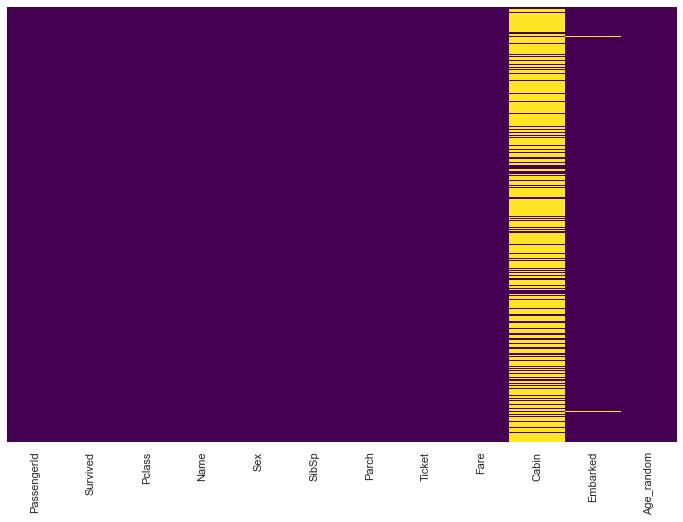

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False, cmap='viridis')

Dropping the 'Embarked' column because it does not has much correlation with the data directly

In [39]:
train.drop('Embarked',axis=1,inplace=True)

<AxesSubplot:>

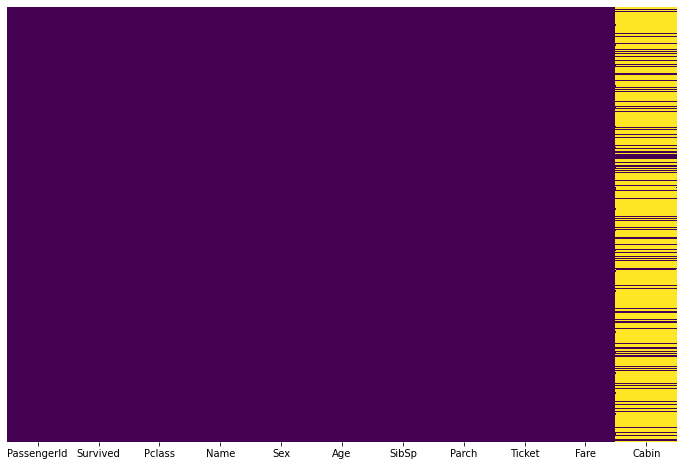

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False, cmap='viridis')

In cabin a huge number of data is missing so this cannot be due to some human error. We cannot replace the missing values with the highest number of occuring one then it will make the data imbalanced.

In [53]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F33            3
              ..
B4             1
D49            1
A5             1
C47            1
C128           1
Name: Cabin, Length: 147, dtype: int64

Since the column is a categorical variable, I cannot make mean median imputation. 

Try to replace the missing values with K Map imputation 

In [40]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

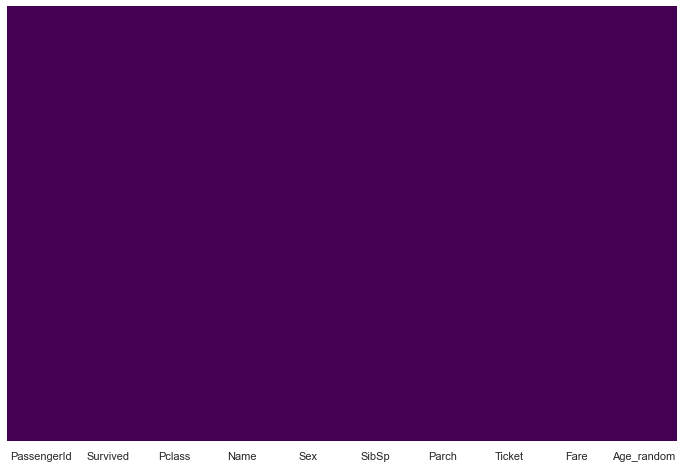

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False, cmap='viridis')

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,35.0


In [48]:
#Since 'Sex' is an object variable therefore converting it to int

# train['Male'] = pd.get_dummies(train['Sex'],drop_first=False)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(train['Sex'])
train['Male'] = label_encoder.transform(train['Sex'])

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age_random,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,35.0,1


In [50]:
train.drop(['PassengerId','Name','Sex','Ticket'], axis=1, inplace=True)

In [51]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_random,Male
0,0,3,1,0,7.2500,22.0,1
1,1,1,1,0,71.2833,38.0,0
2,1,3,0,0,7.9250,26.0,0
3,1,1,1,0,53.1000,35.0,0
4,0,3,0,0,8.0500,35.0,1


### Creating new columns 

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

In [52]:
X = train.drop('Survived', axis=1)
Y = train['Survived']

In [53]:
X.head()

,Pclass,SibSp,Parch,Fare,Age_random,Male
0,3,1,0,7.2500,22.0,1
1,1,1,0,71.2833,38.0,0
2,3,0,0,7.9250,26.0,0
3,1,1,0,53.1000,35.0,0
4,3,0,0,8.0500,35.0,1


In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=0)

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1,n_estimators=14)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=14, n_jobs=-1)

In [56]:
score = clf.score(x_test,y_test)
print("Accuracy=",round(score,2)*100)

Accuracy= 84.0


### Testing with different models

In [58]:
model_name = ['Logistic Regression', 'K-Neighbors Classifier', 
          'Decision Tree', 'Support Vector Classifier', 'Random Forest Classifier']
model_classifier = [LogisticRegression(), KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(),
                   SVC(), RandomForestClassifier()]
model_acc = []

In [59]:
for i in range(len(model_name)):
    clf = model_classifier[i]
    clf.fit(x_train, y_train)
    model_acc.append(clf.score(x_test,y_test))

In [60]:
df = pd.DataFrame({"Classifier type":model_name, "Accuracy":model_acc})
df

,Classifier type,Accuracy
0,Logistic Regression,0.787709
1,K-Neighbors Classifier,0.748603
2,Decision Tree,0.787709
3,Support Vector Classifier,0.720670
4,Random Forest Classifier,0.832402


An accuracy of 83.24 % from Random Forest Classifier 

### TEST DATA

In [64]:
test = pd.read_csv('test.csv')

In [62]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
label_encoder = LabelEncoder()
label_encoder.fit(test['Sex'])
test['Male'] = label_encoder.transform(test['Sex'])

In [64]:
test.drop(['PassengerId','Name','Sex','Ticket'], axis=1, inplace=True)

In [65]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Male
0,3,34.5,0,0,7.8292,NaN,Q,1
1,3,47.0,1,0,7.0000,NaN,S,0
2,2,62.0,0,0,9.6875,NaN,Q,1
3,3,27.0,0,0,8.6625,NaN,S,1
4,3,22.0,1,1,12.2875,NaN,S,0


In [66]:
test.drop(['Cabin','Embarked'], axis=1, inplace=True)

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     332 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   Male    418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [68]:
#Substituing with random values in age column 
def impute_NaN(df,variable):
    df[variable+'_random'] = df[variable]
    #random samples to fill na
    random_samples = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_samples.index = df[df[variable].isnull()].index # changing only the index of the random samples from 'Age' column to 
                                                      # those of the NaN values from the 'Age' column 
    df.loc[df[variable].isnull(),variable+'_random'] = random_samples  #df['variable'].isnull() will give a boolean
                                                                        #series which will serve in selecting rows and then column as variable+'_random'
    

In [69]:
impute_NaN(test,'Age')

In [70]:
test.drop('Age',axis=1,inplace=True)

In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Male        418 non-null    int64  
 5   Age_random  418 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [74]:
mean = test['Fare'].mean()

In [77]:
test['Fare'].fillna(mean,inplace=True)

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Male        418 non-null    int64  
 5   Age_random  418 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [79]:
clf = RandomForestClassifier(n_jobs=-1,n_estimators=14)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=14, n_jobs=-1)

In [80]:
predict = clf.predict(test)

In [81]:
predict

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [83]:
id = test['PassengerId']

In [85]:
submission = pd.DataFrame({"PassengerId":id,'Survived':predict})

In [86]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [87]:
submission.to_csv('my_submission.csv', index=False)

In [ ]:
test = pd.read_csv('test.csv')

In [65]:
train.head()
# rint("------------------")
# print(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train.drop(['Cabin','Ticket'],axis=1,inplace=True)
test.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [67]:
combine = [train,test]

Taking out the titles from the Name 

In [68]:
for data in combine:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.',expand=False) #the expand=False flag returns a DataFrame.
    
pd.crosstab(train['Title'], train['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can see main titles are Master,Miss,Mr,Mrs rest can be included as Rare or merged along with them 

In [69]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


It is in line with our analysis that the ladies(Miss,Mrs) and the children(Master) survived more  

In [70]:
#Label Encoding the dataset['Title'] feels a little wrong , we should have done one hot encoding  
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [71]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]

In [72]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [73]:
#Filling Age Values with median values of that age for a particular Pclass and Gender
#like 3 values of Pclass and 2 values of Gender
age_median = np.zeros((2,3))
age_median
#a median is a value separating the higher half from the lower half of a data sample,a population, or 
#a probability distribution.

array([[0., 0., 0.],
       [0., 0., 0.]])

In [74]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            age_median[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for dataset in combine:            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = age_median[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [75]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

In [76]:
train['AgeBand'] = pd.cut(train['Age'],5) #Bin values into discrete intervals.
#Use cut when you need to segment and sort data values into bins. This function is also useful for going
#from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.

In [77]:
train[['AgeBand','Survived']].groupby('AgeBand',as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


5 Bins taken because when analysing Age people from age group 18-35 most available 

#### Replacing age with ordinals based on these bands

In [78]:
for dataset in combine:
    dataset.loc[(dataset['Age']<=16),'Age'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

train.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [79]:
# now we can drop the AgeBand column after labelling the ages based on bands
train = train.drop(['AgeBand'],axis=1)
combine = [train,test]


Creating new features based on existing features

In [80]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#Family size = 1 means he/she was alone 

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We saw that the persons who were not alone had a higher chance of survival, hence creating a feature of 'is_alone' or not 

In [81]:
for dataset in combine:
    dataset['is_alone'] = 0
    dataset.loc[(dataset['FamilySize']==1),'is_alone'] = 1

train[['is_alone', 'Survived']].groupby(['is_alone'], as_index=False).mean().sort_values(by='Survived', ascending=False)
    

,is_alone,Survived
0,0,0.505650
1,1,0.303538


In [82]:
#We can keep as well as delete familysize, parch, sibsp in response to is_alone
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,is_alone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [83]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int64  
 4   Fare       891 non-null    float64
 5   Embarked   889 non-null    object 
 6   Title      891 non-null    int64  
 7   is_alone   891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [85]:
mode = train.Embarked.dropna().mode()[0]
mode

'S'

In [86]:
train.Embarked.fillna(mode, inplace=True)

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    object 
 6   Title        418 non-null    int64  
 7   is_alone     418 non-null    int64  
 8   Age*Class    418 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 29.5+ KB


In [88]:
fare_median = test.Fare.median()
test['Fare'].fillna(fare_median,inplace = True)

In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   Title        418 non-null    int64  
 7   is_alone     418 non-null    int64  
 8   Age*Class    418 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 29.5+ KB


In [90]:
# Labelling Embarked
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
    
train.head()    

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,is_alone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [91]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending = False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


In [92]:
#Fare Bands
train['FareBand'] = pd.cut(train['Fare'],4)

In [93]:
train[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending = False)

,FareBand,Survived
3,"(384.247, 512.329]",1.000000
2,"(256.165, 384.247]",0.666667
1,"(128.082, 256.165]",0.724138
0,"(-0.512, 128.082]",0.368113


Converting the continuous distribution of Fare into ordinal values based on the range

In [94]:
for dataset in combine:
    dataset.loc[(dataset['Fare']<=128.082),'Fare'] = 0
    dataset.loc[(dataset['Fare']>128.082) & (dataset['Fare']<=256.165),'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 256.165) & (dataset['Fare'] <= 384.247), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 384.247) & (dataset['Fare'] <= 512.329), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train.drop('FareBand',axis=1,inplace=True)    

In [95]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,is_alone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,0,1,3,0,2
2,1,3,1,1,0,0,2,1,3
3,1,1,1,2,0,0,3,0,2
4,0,3,0,2,0,0,1,1,6


In [96]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,is_alone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,0,2,1,1,6
3,895,3,0,1,0,0,1,1,3
4,896,3,1,1,0,0,3,0,3


It is a supervised Learning Classification Problem 

In [98]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [100]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

In [102]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.204938
5,Title,0.409935
6,is_alone,0.275711
4,Embarked,0.267828
3,Fare,0.012456
7,Age*Class,-0.037554
2,Age,-0.493739
0,Pclass,-1.148518


1. Finding out the correlation using various features like Sex has a highly positive 
2. Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).
3. like going in Sex from male:0 to female:1 Probability of Survived increases
4. Going in Pclass from 1 to 3, the prob. of Survived decreases

In [103]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.45

In [108]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.38

In [112]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

64.2

In [115]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.01

In [118]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/home/rishabh/snap/jupyter/common/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.69

In [119]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.24

In [121]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.74

In [125]:

random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.74

In [126]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.74
8,Decision Tree,84.74
1,KNN,82.38
2,Logistic Regression,81.37
7,Linear SVC,79.69
6,Stochastic Gradient Decent,79.24
5,Perceptron,79.01
0,Support Vector Machines,78.45
4,Naive Bayes,64.20


In [128]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission2.csv', index=False)